In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

In [4]:
df = pd.read_csv('tickets_processed.csv')

In [5]:
df['texts_cmb'].sample(20)

,texts_cmb
1802,жалоба абонент абонент утверждать заказывать п...
1871,жалоба абонент абонент утверждать заказывать п...
312,учётный запись интернет-банк долинск мтс колле...
4976,черный список день просьба отключить активный ...
4089,жалоба абонент абонент утверждать заказывать п...
3177,жалоба абонент абонент утверждать заказывать п...
2273,жалоба абонент абонент утверждать заказывать п...
7456,жалоба абонент абонент утверждать заказывать п...
3515,отключить сие ремайндёр здравствуйте коллега о...
7379,черный список день просьба отключить активный ...


## Анализ обработанного текста

Посмотрим на характеристики текстов:

Средняя длина текста: 283.52844488188975
Мин. длина текста: 3.0
Макс. длина текста: 563.0


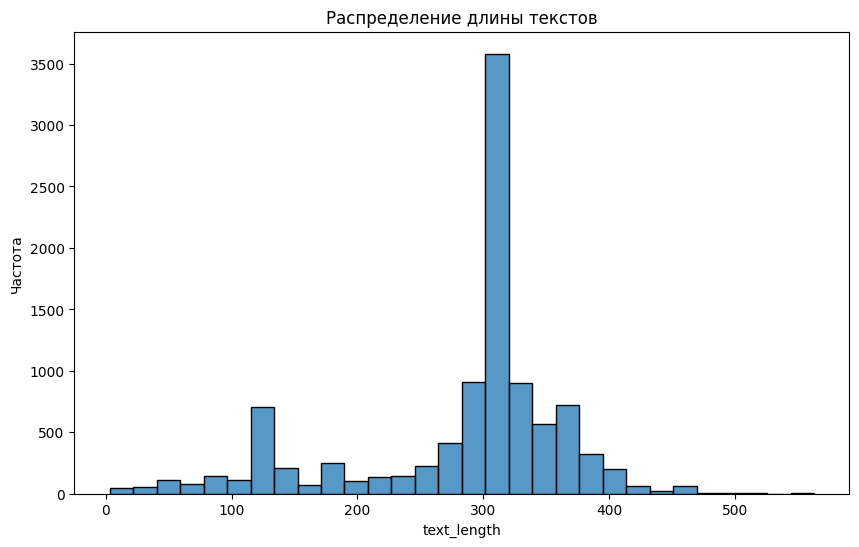

In [7]:
texts = df['texts_cmb']

#  Анализ длины текстов
df['text_length'] = texts.str.len()
print("Средняя длина текста:", df['text_length'].mean())
print("Мин. длина текста:", df['text_length'].min())
print("Макс. длина текста:", df['text_length'].max())

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30)
plt.title("Распределение длины текстов")
plt.ylabel("Частота")
plt.show()

In [38]:
df.texts_cmb = df.texts_cmb.astype(str)
texts_tokenized = [text.split() for text in df['texts_cmb']]

In [20]:
# Частотный анализ слов, биграмм и триграмм

texts = texts.dropna()
vectorizer = CountVectorizer(ngram_range=(1,3), stop_words='english')
X = vectorizer.fit_transform(texts)
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)
print(f"Топ 20 слов и n-грамм:\n", word_freq.head(20))


Топ 20 слов и n-грамм:
 абонент              17185
номер                16014
подписка             15848
дата                  9642
просьба               6159
просить               5992
отключить             5868
жалоба                5015
подключение           4848
вопрос                4811
подключить            4775
просьба отключить     4648
проверить             4608
жалоба абонент        4580
провайдер             4263
средство              4231
компенсация           4140
рассмотреть           4109
списание              4080
заказывать            4065
dtype: int64


## Word2Vec для текстового столбца

In [8]:
w2v_model = Word2Vec(sentences=texts_tokenized, vector_size=100, window=5, min_count=5, sg=1)

# Получение среднего вектора для каждого текста
def get_mean_vector(text):
    words = [w for w in text if w in w2v_model.wv]
    return np.mean(w2v_model.wv[words], axis=0) if words else np.zeros(100)

df['mean_vector'] = df['texts_cmb'].apply(lambda x: get_mean_vector(x.split()))
print(df[['mean_vector']].head())

                                         mean_vector
0  [0.11972752, 0.28799626, 0.2956197, 0.1675393,...
1  [0.16818288, 0.4584202, 0.38896656, 0.23780093...
2  [0.14668432, 0.48252323, 0.40223113, 0.2162054...
3  [0.15105797, 0.49236444, 0.41671875, 0.2207540...
4  [0.17549664, 0.47997233, 0.36089206, 0.2228180...


In [24]:
pd.set_option('display.max_colwidth', None)
df[['texts_cmb', 'mean_vector']].head()

,texts_cmb,mean_vector
0,жалоба абонент просьба ответ запрос использьзовать функция ответить весь абонент всплывать сим меню блокировать работа телефон просьба отключить функционал сие ремандёр апплет сие карта номер абонент дата заказ номер провайдер кц инвойс розница номер подписка описание проблема отключаться тело меню текст сообщение эк,"[0.11972752, 0.28799626, 0.2956197, 0.1675393, 0.08469594, -0.1395087, 0.34588236, 0.6237758, -0.36794156, -0.43095407, 0.1146573, -0.3506492, -0.01741579, -0.030310098, -0.14959219, -0.0904139, 0.2500141, 0.08860241, -0.22107004, -0.5862031, 0.24213922, 0.18847643, 0.10358049, -0.3355823, -0.048173506, 0.07420803, -0.2564671, 0.22191216, -0.32082504, 0.015759774, 0.107860655, -0.19192176, 0.18250878, -0.33246395, -0.23027915, 0.18314272, 0.30172068, -0.2563639, -0.46153986, 0.022163656, 0.16944133, -0.36872664, -0.06164089, 0.23103814, -0.20708027, -0.22261521, -0.27172315, -0.46902707, 0.09578287, 0.16580646, 0.0433986, -0.27196193, 0.08192245, -0.3562972, 0.12616204, -0.23355444, 0.19721924, -0.033733997, -0.08691997, -0.109878905, 0.08658663, -0.112961784, 0.28803396, -0.16168444, -0.031534363, 0.62393904, 0.19408526, 0.3104376, -0.34280184, 0.17379817, 0.04251233, 0.39186314, 0.08214232, 0.020649374, 0.21985057, 0.17679743, 0.2568254, 0.13799708, -0.15199438, 0.04437431, -0.58704364, 0.28055865, -0.1842716, 0.22048269, -0.08535909, -0.028323963, 0.15457809, -0.232888, 0.1630533, 0.0072823507, 0.3960371, 0.06974162, 0.17233594, -0.19193245, 0.3255352, 0.053879302, 0.22373597, 0.2873928, 0.101673536, 0.078619264]"
1,жалоба абонент абонент утверждать заказывать просить проверить корректность списание рассмотреть вопрос компенсация просьба отключить абонент подписка номер подключить подписка б2с дата подключение подписка б2б дата необходимо скорректировать денежный средство,"[0.16818288, 0.4584202, 0.38896656, 0.23780093, -0.16124958, -0.42454058, 0.036219217, 0.8470835, -0.38010603, -0.58207613, 0.21113142, -0.36581, 0.15379839, 0.2461443, -0.08946002, -0.2032815, 0.40656665, 0.14358863, -0.05583893, -0.6825769, 0.3050894, -0.17082243, 0.31026712, -0.36116433, -0.26736242, 0.1920674, -0.598866, 0.25036314, 0.08630195, 0.14866874, 0.13614652, -0.5815011, -0.15711254, -0.75512636, -0.14096168, 0.3990949, 0.32424733, 0.053791128, -0.5109282, 0.2282746, 0.20766522, -0.4706733, -0.18647623, 0.5079178, 0.12233814, -0.3694475, -0.39657867, -0.45362332, 0.35666868, 0.25421333, 0.106902346, -0.044408355, -0.04012407, 0.0257374, -0.15825564, -0.12194354, 0.28268075, -0.22231786, 0.18172808, 0.019416982, -0.19238748, -0.17635804, 0.3602222, 0.16031907, -0.028381761, 0.85157275, 0.19520062, 0.20595421, -0.4333487, 0.0970574, 0.2103336, 0.42602655, 0.3166073, 0.077719, 0.40142906, 0.3086246, 0.47060406, 0.16340077, 0.119667575, 0.18978226, -0.7062497, -0.05615684, 0.19414468, 0.12934385, -0.05694538, -0.16161916, 0.14543115, -0.3036067, 0.21989909, 0.33219486, 0.40532744, 0.08300871, 0.06854935, -0.067788385, 0.1459693, -0.03586447, 0.03502739, 0.2132251, 0.047170058, 0.1828809]"
2,жалоба абонент абонент утверждать заказывать просить проверить корректность списание рассмотреть вопрос компенсация просьба отключить абонент подписка удаль лишний информация номер подключить подписка б2с дата подключение подписка б2б дата необходимо скорректировать денежный средство номер провайдер дс инвойс роза,"[0.14668432, 0.48252323, 0.40223113, 0.21620543, -0.15327981, -0.41559163, 0.043182645, 0.87538016, -0.37908214, -0.6525052, 0.2317365, -0.33904353, 0.1645914, 0.22909835, -0.07642488, -0.17532879, 0.41969386, 0.16033927, -0.09467849, -0.6444567, 0.29558393, -0.16717432, 0.3503085, -0.39453286, -0.26336953, 0.17173395, -0.5556531, 0.22989789, 0.06264798, 0.11812621, 0.1099657, -0.57438797, -0.16470733, -0.72893316, -0.14869578, 0.3754603, 0.32075685, 0.05348346, -0.4973144, 0.23330346, 0.24499452, -0.40674016, -0.19248351, 0.48546267, 0.095362455, -0.39523116, -0.32402, -0.5127072, 0.33183953, 0.2080442, 0.1332

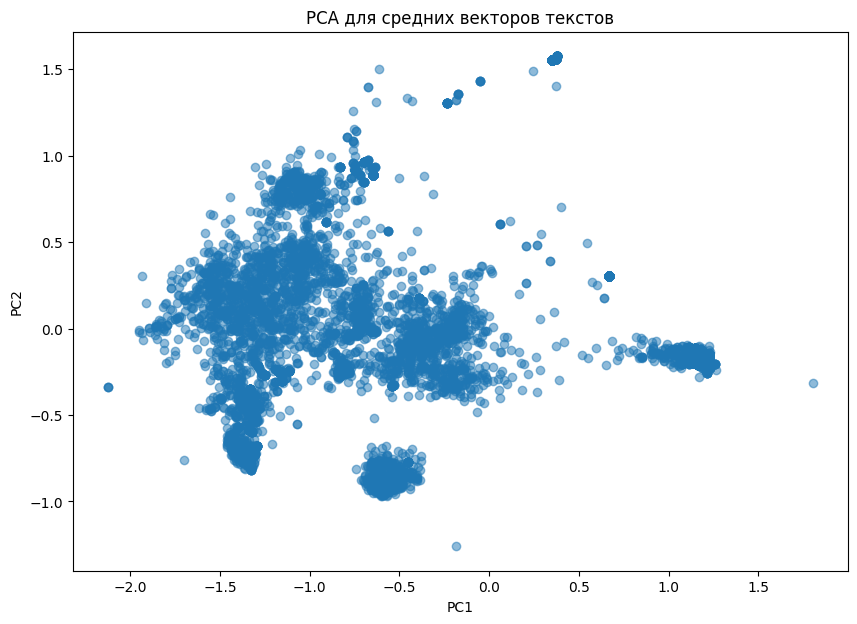

In [10]:
from sklearn.decomposition import PCA

# Преобразуем средние векторы с помощью PCA до 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(list(df['mean_vector']))

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA для средних векторов текстов')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


Посмотрим, что получилось в результате работы word2vec:

In [44]:
word = 'жалоба'
if word in w2v_model.wv:
    similar_words = w2v_model.wv.most_similar(word, topn=5)
    print(f"Ближайшие слова к '{word}':")
    for sim_word, similarity in similar_words:
        print(f"{sim_word}: {similarity}")
else:
    print(f"Слово '{word}' не найдено в модели.")

Ближайшие слова к 'жалоба':
позиция: 0.6521171927452087
проверить: 0.6343406438827515
тарифный: 0.619476318359375
параметр: 0.6081440448760986
скопировать: 0.6077806353569031


In [48]:
exclude_words = {'абонент', 'жалоба'}

try:
    new_vector = w2v_model.wv['абонент'] - w2v_model.wv['подписка'] + w2v_model.wv['жалоба']
    closest_words = w2v_model.wv.similar_by_vector(new_vector, topn=10)

    print("\nРезультаты арифметики слов 'абонент' - 'подписка' + 'жалоба':")
    for word, similarity in closest_words:
        if word not in exclude_words:
            print(f"{word}: {similarity}")
except KeyError as e:
    print(f"Некоторых слов нет в модели: {e}")


Результаты арифметики слов 'абонент' - 'подписка' + 'жалоба':
работоспособность: 0.6092013120651245
невозможность: 0.5014173984527588
позиция: 0.47846919298171997
параметр: 0.4640149176120758
перейти: 0.4611060619354248
воспользоваться: 0.4581638276576996
ркн: 0.4533978998661041
ключ: 0.42875322699546814


In [54]:
try:
    result = w2v_model.wv.most_similar(positive=['провайдер', 'билайн'], negative=['мтс'], topn=1)
    print("\nРезультат анализа аналогии (провайдер и билайн без мтс):")
    print(result)
except KeyError as e:
    print(f"Некоторых слов нет в модели: {e}")



Результат анализа аналогии (провайдер и билайн без мтс):
[('вымпелком', 0.5232748985290527)]


In [60]:
word1, word2 = 'б2б', 'б2с'
if word1 in w2v_model.wv and word2 in w2v_model.wv:
    similarity = w2v_model.wv.similarity(word1, word2)
    print(f"\nПохожесть между '{word1}' и '{word2}': {similarity}")
else:
    print(f"Одного из слов ('{word1}' или '{word2}') нет в модели.")


Похожесть между 'б2б' и 'б2с': 0.8188971281051636


In [66]:
w2v_model.wv.most_similar('список', topn=5)

[('чёрный', 0.7802978157997131),
 ('навсегда', 0.7760419845581055),
 ('вечер', 0.7002049684524536),
 ('внести', 0.7000921368598938),
 ('извлечь', 0.6937567591667175)]

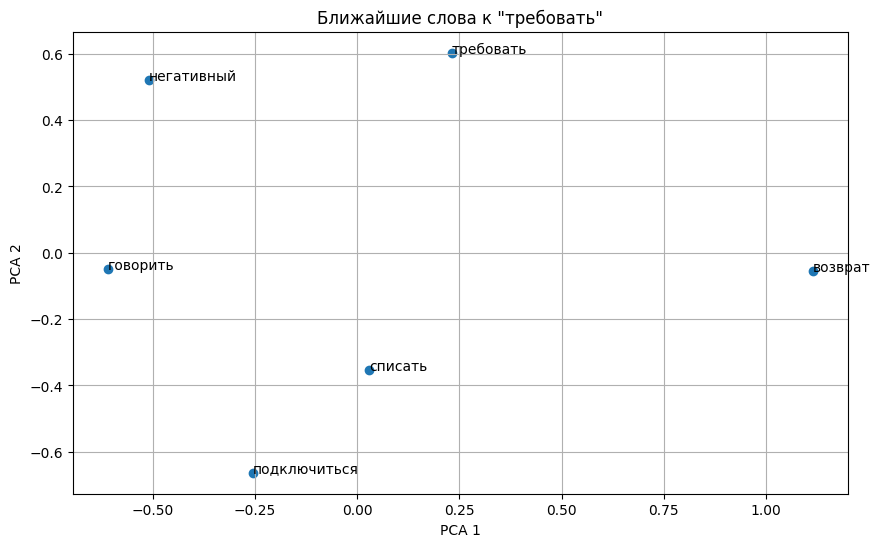

In [90]:
from sklearn.decomposition import PCA

word = 'требовать'
nearest_words = w2v_model.wv.similar_by_word(word, topn=5)

words = [word] + [w[0] for w in nearest_words]
word_vectors = w2v_model.wv[words]

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)


plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

for i, w in enumerate(words):
    plt.annotate(w, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

plt.title(f'Ближайшие слова к "{word}"')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()
plt.show()